<a href="https://colab.research.google.com/github/az2611/BerkeleyML_Module_11/blob/main/Ridge_10_prompt_II_AZS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel

from scipy.linalg import svd
import seaborn as sns
import pandas as pd

from random import shuffle, seed

import warnings

set_config(display="diagram")

# What drives the price of a car?

![](UC_Berkeley_Certificate/Module_10/practical_application_II_starter/images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = My Drive/UC_Berkeley_Certificate/Module_10/practical_application_II_starter/images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

# **Business Understanding**

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

**1. Determine Business Objectives**
  
The goal of this project is to develop a predictive model allowing to predict with confidence the price of a car, and to identify the key features that determine the price of a car.

**2. Assess Situation**  
  
The provided dataset contains information on 426K and 17 features (numerical and categorical).  
  
**3.Determine Data Mining Goals**  
  
The data analysis goals for this project include, performin *Feature Selection* to identify the top features that determine the price of a car.
  
**4.Produce Project Plan**
  
- Perform Data Preparation, including hot encoding for categorical features.
- Standardize data
- Develop a linear model that include hyperparameter optimization.

⚽ ⚽ ⚽ ⚽ ⚽ ⚽

# **Data Understanding**

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

1. Load data
2. Get data info
3. Identify Categorical vs. Numeric Variables 
4. Identify and deal with outliers
5. Identify and drop non-informative columns



In [ ]:
df = pd.read_csv('/content/drive/My Drive/UC_Berkeley_Certificate/Module_10/practical_application_II_starter/data/vehicles.csv', index_col=0, infer_datetime_format=True)

In [ ]:
df.describe()

,price,year,odometer
count,4.268800e+05,425675.000000,4.224800e+05
mean,7.519903e+04,2011.235191,9.804333e+04
std,1.218228e+07,9.452120,2.138815e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.900000e+03,2008.000000,3.770400e+04
50%,1.395000e+04,2013.000000,8.554800e+04
75%,2.648575e+04,2017.000000,1.335425e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426880 entries, 7222695916 to 7301591129
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  VIN           265838 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(14)

In [ ]:
df.tail()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
id,,,,,,,,,,,,,,,,,
7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


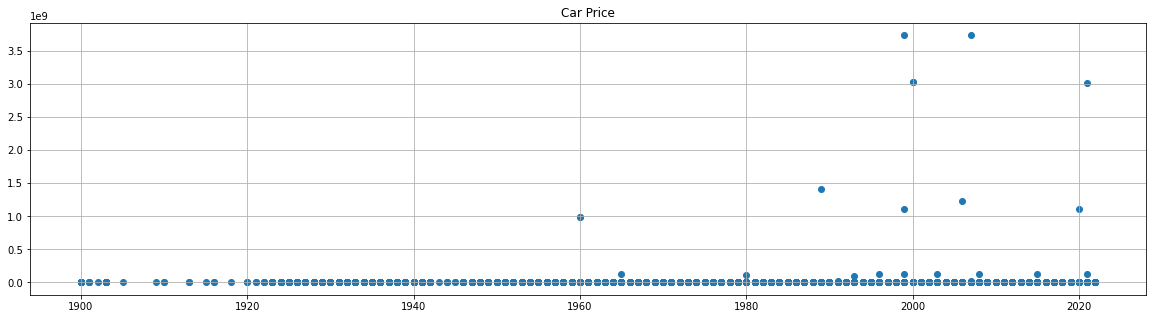

In [ ]:
X, y = df[['year']], df['price']

plt.figure(figsize=(20,5))
plt.scatter(X, y)
plt.title('Car Price')
plt.grid();

### **Data Preparation**

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [ ]:
#Dropping non-informative columns
df = df.drop('VIN',axis=1)
df = df.drop('region',axis=1)
df = df.drop('model',axis=1)
df = df.drop('state',axis=1)

In [ ]:
#Drop Rows with NAs
df = pd.DataFrame(df).dropna()

In [ ]:
#Use only data from second half of 20th Century
df = df[df.year >= 1950]
df['year'] = df['year'].astype('int').astype('object') #Setting up Year as Categorical Variable

In [ ]:
#Remove Outliers
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQR=Q3-Q1
df = df[~((df['price']<(Q1-1.5*IQR)) | (df['price']>(Q3+1.5*IQR)))]

print ('Q1: '+str(round(Q1,2)))
print ('Q3: '+str(round(Q3,2)))
print ('IQR: '+str(round(IQR,2)))

Q1: 4950.0
Q3: 17500.0
IQR: 12550.0


In [ ]:
#Setting up Odometer as Categorical Variable
df['odometer'] = df['odometer'].astype('int')

In [ ]:
#Understanding Data Dimensions
for i in df.columns:
  if df[i].dtype == 'object':
    print(i + ' = ', len(np.unique(df[i])))

year =  73
manufacturer =  41
condition =  6
cylinders =  8
fuel =  5
title_status =  6
transmission =  3
drive =  3
size =  4
type =  13
paint_color =  12


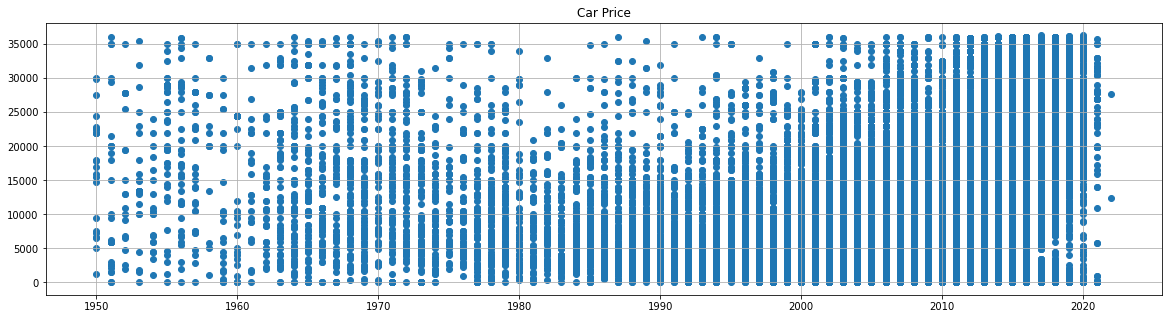

In [ ]:
X, y = df[['year']], df['price']

plt.figure(figsize=(20,5))
plt.scatter(X, y)
plt.title('Car Price')
plt.grid()

#### **Dummy variable creation**

In [ ]:
#Creating Category Columns
categ_cols=[]
num_cols=[]

for i in df.columns:
    if df[i].dtype=='object':
        df[i] = df[i].astype('category')
        categ_cols.append(i)
    else:
        num_cols.append(i)

In [ ]:
df_dumm = pd.get_dummies(df[categ_cols])
df_dumm = pd.DataFrame(df_dumm)
df_dumm = df.drop(categ_cols,axis=1).join(df_dumm)
df_dumm.head()

,price,odometer,year_1950,year_1951,year_1952,year_1953,year_1954,year_1955,year_1956,year_1957,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
id,,,,,,,,,,,,,,,,,,,,,
7316356412,15000,128000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7314560853,19900,88000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7313406529,14000,95000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7312847466,22500,144700,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7312144944,15000,90000,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df_dumm.describe()

,price,odometer,year_1950,year_1951,year_1952,year_1953,year_1954,year_1955,year_1956,year_1957,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
count,75295.000000,7.529500e+04,75295.000000,75295.000000,75295.000000,75295.000000,75295.000000,75295.000000,75295.000000,75295.000000,...,75295.000000,75295.000000,75295.000000,75295.000000,75295.000000,75295.000000,75295.000000,75295.000000,75295.000000,75295.000000
mean,10944.170901,1.285734e+05,0.000319,0.000398,0.000266,0.000345,0.000266,0.000558,0.000518,0.000452,...,0.032671,0.025951,0.034624,0.120141,0.005605,0.003161,0.101481,0.148376,0.237267,0.008181
std,8538.495554,2.459686e+05,0.017851,0.019957,0.016296,0.018579,0.016296,0.023611,0.022753,0.021245,...,0.177777,0.158991,0.182826,0.325128,0.074654,0.056133,0.301966,0.355475,0.425410,0.090080
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4600.000000,7.856750e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8500.000000,1.174750e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15495.000000,1.581805e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,36300.000000,1.000000e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### **Train/Test sets**

In [ ]:
X=df_dumm.drop(columns=['price'],axis=1)
y=df_dumm[['price']]
num_cols.remove('price')

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=30)

### **Modeling**

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [ ]:
ridge_param_dict = ''
ridge_pipe = ''
ridge_grid = ''
ridge_train_mse = ''
ridge_test_mse = ''

ridge_param_dict = {'ridge__alpha': [0.001, 1.0, 10.0, 100.0]}
ridge_pipe = Pipeline([('scaler', StandardScaler()),
                       ('ridge', Ridge())])
ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_param_dict).fit(X_train,y_train)

preds_train = ridge_grid.predict(X_train)
preds_test = ridge_grid.predict(X_test)

ridge_train_mse = mean_squared_error(y_train,preds_train)
ridge_test_mse = mean_squared_error(y_test,preds_test)

print(f'Train MSE: {ridge_train_mse}')
print(f'Test MSE: {ridge_test_mse}')

ridge_pipe

Train MSE: 39994176.264807485
Test MSE: 41866874.674884774


Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge())])

In [ ]:
ridge_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.001, 1.0, 10.0, 100.0]})

In [ ]:
best_alpha = ridge_grid.best_params_
best_alpha

{'ridge__alpha': 100.0}

### `Ridge` regressor to extract coefficients

In [ ]:
scaled_pipe = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())]).fit(X_train, y_train)

train_preds = scaled_pipe.predict(X_train)
test_preds = scaled_pipe.predict(X_test)

train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

feature_names=X_train.columns
coef_r= scaled_pipe.named_steps['ridge'].coef_


Train MSE: 39994080.49535024
Test MSE: 41868667.80620645


In [ ]:
coefic=pd.DataFrame(coef_r, columns = feature_names, index = ['model'])
coefic

,odometer,year_1950,year_1951,year_1952,year_1953,year_1954,year_1955,year_1956,year_1957,year_1958,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
model,-548.692516,113.744074,57.605517,19.687847,46.200435,1.130499,210.095129,163.202788,129.507974,120.84677,...,-116.900289,48.378384,-59.563676,17.911584,88.328474,-20.739289,-15.118558,-48.588635,72.913963,74.698541


In [ ]:
coef_v=coefic.T
coef_v= coef_v.reset_index(level=0)
coef_v['model_abs']=abs(coef_v['model'])

coef_v = coef_v.sort_values("model_abs", axis = 0, ascending = False)
coef_v = coef_v.head(30)

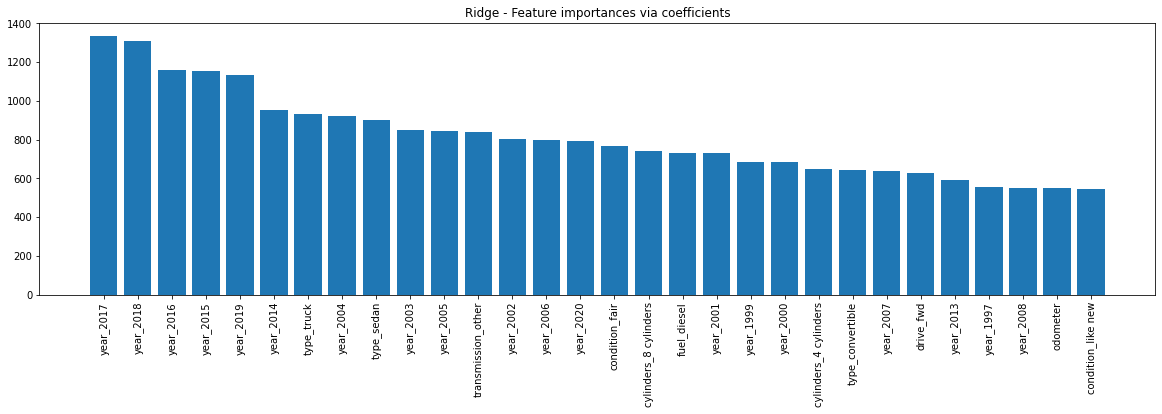

In [ ]:
importance = coef_v['model_abs']
feature_names = coef_v['index']

plt.figure(figsize=(20,5))
plt.bar(height=importance, x=feature_names)
plt.title("Ridge - Feature importances via coefficients")
plt.xticks(rotation=90)
plt.show()

In [ ]:
coef_v

,index,model,model_abs
68,year_2017,1335.263233,1335.263233
69,year_2018,1308.596644,1308.596644
67,year_2016,1157.795806,1157.795806
66,year_2015,1156.295279,1156.295279
70,year_2019,1134.613524,1134.613524
65,year_2014,951.028221,951.028221
160,type_truck,931.390738,931.390738
55,year_2004,-922.372050,922.372050
159,type_sedan,-899.708115,899.708115
54,year_2003,-849.625347,849.625347


### `Ridge` regressor to extract coefficients with Feature Selection

In [ ]:
best_features_pipe = Pipeline([('scaler', StandardScaler()), ('selector', SequentialFeatureSelector(Ridge(), n_features_to_select=30))]).fit(X_train, y_train)
best_features = best_features_pipe.fit_transform(X_train, y_train)

In [ ]:
feature_names= best_features_pipe.named_steps['selector'].get_feature_names_out()
feature_names

array(['x0', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66',
       'x67', 'x68', 'x69', 'x70', 'x71', 'x84', 'x112', 'x116', 'x117',
       'x118', 'x124', 'x127', 'x129', 'x142', 'x144', 'x147', 'x152',
       'x153', 'x158', 'x159', 'x160'], dtype=object)

In [ ]:
best_features_df = pd.DataFrame(best_features , columns = feature_names)
best_features_df.head()

,x0,x59,x60,x61,x62,x63,x64,x65,x66,x67,...,x127,x129,x142,x144,x147,x152,x153,x158,x159,x160
0,0.484345,-0.256338,-0.214307,-0.23514,-0.257659,-0.261122,-0.278336,-0.269687,-0.252863,-0.227372,...,-0.630802,-0.230664,-0.10804,1.287413,-1.081070,-0.169745,-0.240246,-0.293088,1.573092,-0.422968
1,-0.459400,-0.256338,-0.214307,-0.23514,-0.257659,-0.261122,-0.278336,-0.269687,-0.252863,-0.227372,...,-0.630802,-0.230664,-0.10804,-0.776752,-1.081070,-0.169745,-0.240246,-0.293088,-0.635691,-0.422968
2,0.174161,-0.256338,-0.214307,-0.23514,3.881100,-0.261122,-0.278336,-0.269687,-0.252863,-0.227372,...,-0.630802,-0.230664,-0.10804,1.287413,-1.081070,-0.169745,-0.240246,-0.293088,-0.635691,-0.422968
3,0.506147,-0.256338,-0.214307,-0.23514,-0.257659,-0.261122,-0.278336,-0.269687,-0.252863,-0.227372,...,1.585283,-0.230664,-0.10804,-0.776752,0.925009,-0.169745,-0.240246,-0.293088,-0.635691,-0.422968
4,-0.148663,-0.256338,-0.214307,-0.23514,-0.257659,-0.261122,-0.278336,3.708000,-0.252863,-0.227372,...,-0.630802,-0.230664,-0.10804,1.287413,-1.081070,-0.169745,-0.240246,-0.293088,1.573092,-0.422968


In [ ]:
#Linear Regression
X_train_l = best_features_df 
lr = LinearRegression()
model = lr.fit(X_train_l, y_train)
feature_names = X_train_l.columns
coefs = model.coef_

In [ ]:
#Remove X from column indes
best_features_df.columns = best_features_df.columns.str.replace('x','')
best_features_df

cols_indx=best_features_df.columns
cols_indx=cols_indx.astype('int')

cols_final= X_train.iloc[:,cols_indx].columns

In [ ]:
best_features_df.columns = cols_final
coef_tab = pd.DataFrame(coefs, columns = cols_final, index = ['model'])
coef_tab
best_features_df.head()

,odometer,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,...,cylinders_8 cylinders,fuel_diesel,transmission_other,drive_fwd,size_full-size,type_convertible,type_coupe,type_pickup,type_sedan,type_truck
0,0.484345,-0.256338,-0.214307,-0.23514,-0.257659,-0.261122,-0.278336,-0.269687,-0.252863,-0.227372,...,-0.630802,-0.230664,-0.10804,1.287413,-1.081070,-0.169745,-0.240246,-0.293088,1.573092,-0.422968
1,-0.459400,-0.256338,-0.214307,-0.23514,-0.257659,-0.261122,-0.278336,-0.269687,-0.252863,-0.227372,...,-0.630802,-0.230664,-0.10804,-0.776752,-1.081070,-0.169745,-0.240246,-0.293088,-0.635691,-0.422968
2,0.174161,-0.256338,-0.214307,-0.23514,3.881100,-0.261122,-0.278336,-0.269687,-0.252863,-0.227372,...,-0.630802,-0.230664,-0.10804,1.287413,-1.081070,-0.169745,-0.240246,-0.293088,-0.635691,-0.422968
3,0.506147,-0.256338,-0.214307,-0.23514,-0.257659,-0.261122,-0.278336,-0.269687,-0.252863,-0.227372,...,1.585283,-0.230664,-0.10804,-0.776752,0.925009,-0.169745,-0.240246,-0.293088,-0.635691,-0.422968
4,-0.148663,-0.256338,-0.214307,-0.23514,-0.257659,-0.261122,-0.278336,3.708000,-0.252863,-0.227372,...,-0.630802,-0.230664,-0.10804,1.287413,-1.081070,-0.169745,-0.240246,-0.293088,1.573092,-0.422968


In [ ]:
coef_v=coef_tab .T
coef_v= coef_v.reset_index(level=0)
coef_v['model_abs']=abs(coef_v['model'])

coef_v = coef_v.sort_values("model_abs", axis = 0, ascending = False)
coef_v = coef_v.head(30)

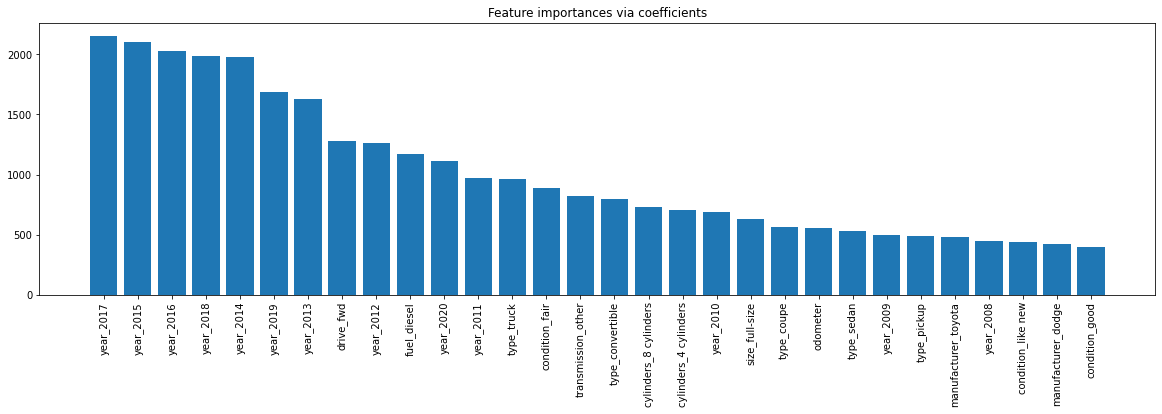

In [ ]:
importance = coef_v['model_abs']
feature_names = coef_v['index']

plt.figure(figsize=(20,5))
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.xticks(rotation=90)
plt.show()

In [ ]:
coef_v

,index,model,model_abs
10,year_2017,2154.488973,2154.488973
8,year_2015,2103.024887,2103.024887
9,year_2016,2028.565681,2028.565681
11,year_2018,1982.849179,1982.849179
7,year_2014,1974.531797,1974.531797
12,year_2019,1690.190151,1690.190151
6,year_2013,1631.757924,1631.757924
23,drive_fwd,-1277.979070,1277.979070
5,year_2012,1261.964836,1261.964836
21,fuel_diesel,1166.694412,1166.694412


### Lasso regressor as feature selection

In [ ]:
best_features_pipe_l = Pipeline([('scaler', StandardScaler()), ('selector', SequentialFeatureSelector(Lasso(), n_features_to_select=30))]).fit(X_train, y_train)
best_features_l = best_features_pipe_l.fit_transform(X_train, y_train)
best_features_l

array([[ 0.48434481, -0.25633753, -0.21430659, ..., -0.29308828,
         1.57309227, -0.42296814],
       [-0.45939996, -0.25633753, -0.21430659, ..., -0.29308828,
        -0.63569062, -0.42296814],
       [ 0.17416147, -0.25633753, -0.21430659, ..., -0.29308828,
        -0.63569062, -0.42296814],
       ...,
       [ 0.06724507, -0.25633753, -0.21430659, ..., -0.29308828,
        -0.63569062,  2.36424428],
       [ 0.17994753, -0.25633753, -0.21430659, ..., -0.29308828,
        -0.63569062,  2.36424428],
       [ 0.16904625,  3.90110654, -0.21430659, ..., -0.29308828,
        -0.63569062, -0.42296814]])

In [ ]:
feature_names_l= best_features_pipe_l.named_steps['selector'].get_feature_names_out()
feature_names_l

array(['x0', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66',
       'x67', 'x68', 'x69', 'x70', 'x71', 'x84', 'x112', 'x116', 'x117',
       'x118', 'x124', 'x127', 'x129', 'x142', 'x144', 'x147', 'x152',
       'x153', 'x158', 'x159', 'x160'], dtype=object)

In [ ]:
best_features_df_l = pd.DataFrame(best_features_l , columns = feature_names_l)
best_features_df_l.head()

,x0,x59,x60,x61,x62,x63,x64,x65,x66,x67,...,x127,x129,x142,x144,x147,x152,x153,x158,x159,x160
0,0.484345,-0.256338,-0.214307,-0.23514,-0.257659,-0.261122,-0.278336,-0.269687,-0.252863,-0.227372,...,-0.630802,-0.230664,-0.10804,1.287413,-1.081070,-0.169745,-0.240246,-0.293088,1.573092,-0.422968
1,-0.459400,-0.256338,-0.214307,-0.23514,-0.257659,-0.261122,-0.278336,-0.269687,-0.252863,-0.227372,...,-0.630802,-0.230664,-0.10804,-0.776752,-1.081070,-0.169745,-0.240246,-0.293088,-0.635691,-0.422968
2,0.174161,-0.256338,-0.214307,-0.23514,3.881100,-0.261122,-0.278336,-0.269687,-0.252863,-0.227372,...,-0.630802,-0.230664,-0.10804,1.287413,-1.081070,-0.169745,-0.240246,-0.293088,-0.635691,-0.422968
3,0.506147,-0.256338,-0.214307,-0.23514,-0.257659,-0.261122,-0.278336,-0.269687,-0.252863,-0.227372,...,1.585283,-0.230664,-0.10804,-0.776752,0.925009,-0.169745,-0.240246,-0.293088,-0.635691,-0.422968
4,-0.148663,-0.256338,-0.214307,-0.23514,-0.257659,-0.261122,-0.278336,3.708000,-0.252863,-0.227372,...,-0.630802,-0.230664,-0.10804,1.287413,-1.081070,-0.169745,-0.240246,-0.293088,1.573092,-0.422968


In [ ]:
lasso=LinearRegression()
model_lasso=lasso.fit(best_features_df_l,y_train)
coefs_l = model_lasso.coef_
coefs_l

array([[ -557.20452742,   445.90031154,   493.79297809,   691.70849037,
          973.60715044,  1261.96483628,  1631.75792384,  1974.53179697,
         2103.02488746,  2028.56568135,  2154.48897305,  1982.84917895,
         1690.19015137,  1113.39153265,  -419.37668086,   479.37762188,
         -887.58787128,  -398.79396743,   436.84354819,  -705.68707865,
          733.53740492,  1166.69441216,  -818.09336261, -1277.97906957,
          632.35763282,   793.04180896,   566.26998869,   487.77108512,
         -526.08468771,   962.22945256]])

In [ ]:
#Remove X from column indes
best_features_df_l.columns = best_features_df_l.columns.str.replace('x','')
best_features_df_l

cols_indx=best_features_df_l.columns
cols_indx=cols_indx.astype('int')

cols_final= X_train.iloc[:,cols_indx].columns
cols_final

Index(['odometer', 'year_2008', 'year_2009', 'year_2010', 'year_2011',
       'year_2012', 'year_2013', 'year_2014', 'year_2015', 'year_2016',
       'year_2017', 'year_2018', 'year_2019', 'year_2020',
       'manufacturer_dodge', 'manufacturer_toyota', 'condition_fair',
       'condition_good', 'condition_like new', 'cylinders_4 cylinders',
       'cylinders_8 cylinders', 'fuel_diesel', 'transmission_other',
       'drive_fwd', 'size_full-size', 'type_convertible', 'type_coupe',
       'type_pickup', 'type_sedan', 'type_truck'],
      dtype='object')

In [ ]:
coef_tab_l = pd.DataFrame(coefs_l, columns = cols_final, index = ['model'])
coef_tab_l

,odometer,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,...,cylinders_8 cylinders,fuel_diesel,transmission_other,drive_fwd,size_full-size,type_convertible,type_coupe,type_pickup,type_sedan,type_truck
model,-557.204527,445.900312,493.792978,691.70849,973.60715,1261.964836,1631.757924,1974.531797,2103.024887,2028.565681,...,733.537405,1166.694412,-818.093363,-1277.97907,632.357633,793.041809,566.269989,487.771085,-526.084688,962.229453


In [ ]:
coef_v=coef_tab_l.T
coef_v= coef_v.reset_index(level=0)
coef_v['model_abs']=abs(coef_v['model'])

coef_v = coef_v.sort_values("model_abs", axis = 0, ascending = False)
coef_v = coef_v.head(30)

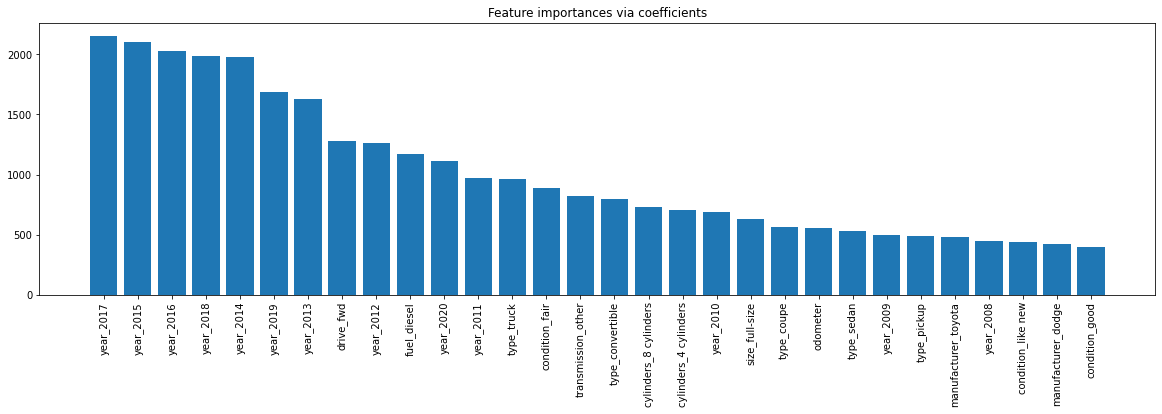

In [ ]:
importance = coef_v['model_abs']
feature_names = coef_v['index']

plt.figure(figsize=(20,5))
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.xticks(rotation=90)
plt.show()

In [ ]:
coef_v

,index,model,model_abs
10,year_2017,2154.488973,2154.488973
8,year_2015,2103.024887,2103.024887
9,year_2016,2028.565681,2028.565681
11,year_2018,1982.849179,1982.849179
7,year_2014,1974.531797,1974.531797
12,year_2019,1690.190151,1690.190151
6,year_2013,1631.757924,1631.757924
23,drive_fwd,-1277.979070,1277.979070
5,year_2012,1261.964836,1261.964836
21,fuel_diesel,1166.694412,1166.694412


### **Evaluation**

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In order to solve for this model several approaches where tested, starting with PCA which demonstrated to be non-optimal as an overwhelmy quantity of features are categorical.  
  
Moreover, I tried GridSearchCV() in order to achieve parameter optimization in terms of alpha and numer of features for SequentialFeatureSelector(), unfortunatelly processing time extended signficantly and considering the limited time to deliver I opted to explore a fixed set of features.  

Polynomial was not explored but this is also something that should have been reviewed.
  
In the case of the "year" variable, according to my research this should be treated as a categorical variable. However, when reviewing the results it was clear that the year variables dominated the top-variables for prediction and considering the business objective for this analysis, I decided to try it as a numerical variable, resulting in a model with the year remaining as the top variable to predict price.
  
Despite the two approaches (Ridge vs. Lasso) provide basically the same results, would be worth to explore further why is this and potential finetunning that could be performed for each method.

Check for overfit and error was minimal and this is another area that requires closer review.
  
I think this submission is a good first approach but certainly requires a lot of refinement and performance optimization. 

### **Deployment**

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

According to our analysis we reached the following conclusions:
* Model Year has the biggest impact and can be considered the most important reature to predict the price of a car.
* Recent models years (from 2013 and higher) have the highest impact on the price of a car. 
* Forward drive can impact negatively the value of a car.
* Diesel Engine contribute to increase the value of a car.
* Truck also contribute positively to the price of a car vs. sedan that can actually impact negatively in the price.
* Convertible contributes positely to a price
* Manufacturers such as Dodge and Toyota can put a premium on the price. 

For example,
* A 2019 Dodge Diesel Truck will have a higher price than a similar truck from another brand.
* A 2020 convertible toyota sedan (diesel), will price better than a 2020 non-convertible Toyota sedan (gasoline). 